In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import collections
import seaborn as sns

from os import listdir
from os.path import isfile, join
from sklearn.linear_model import LinearRegression

In [6]:
# Create independent pandas dataframe sets for each crawler strategy
crawlers = {}
path = "results/simulation"

for f in listdir(path):
    filePath = join(path, f)

    if not isfile(filePath):
        continue
        
    m = re.search(r"Crawler-PS(\d+)-(\d+)-(\w+).csv", f)
        
    if m:
        peerSelectVersion = int(m.group(1))
        distributionPercentage = int(m.group(2))
        evalVersion = m.group(3)
        
        if not evalVersion in crawlers:
            crawlers[evalVersion] = {}
            
        if not peerSelectVersion in crawlers[evalVersion]:
            crawlers[evalVersion][peerSelectVersion] = {}

        crawlers[evalVersion][peerSelectVersion][distributionPercentage] = pd.read_csv(filePath)

for evalVersion in crawlers:
    for k, v in crawlers[evalVersion].items():
        crawlers[evalVersion][k] = collections.OrderedDict(sorted(v.items()))

In [7]:
# global attributes
plt.rcParams.update({'font.size': 18})
#sns.set_palette(sns.color_palette("hls", 20))

def createPlot(ax1, ax2):
    ax1.set(ylabel='Precision', title='Average Precision')
    ax2.set(ylabel='Recall', xlabel='# URL packs propagated', title='Average Recall')
    
def plotData(crawlerVersion, peerSelectVersion):
    for distributionPercentage, dataframe in crawlers[crawlerVersion][peerSelectVersion].items():
        ax1.plot(dataframe['PackNum'], dataframe['Precision'], label=distributionPercentage)
        ax2.plot(dataframe['PackNum'], dataframe['Recall'], label=distributionPercentage)
        
def plotRegression(crawlerVersion):
    for distributionPercentage, dataframe in crawlers[crawlerVersion].items():
        x = np.array(dataframe['PackNum']).reshape((-1, 1))
        maxVal = np.amax(x)
        numberVals = x.shape[0]
        precisionModel = LinearRegression(fit_intercept=False).fit(x, np.array(dataframe['Precision']))
        recallModel = LinearRegression().fit(x, np.array(dataframe['Recall']))
        
        xPred = []
        for i in range(1, numberVals + 1):
            xPred.append(maxVal / i)
        
        yPredPrecision = np.minimum(precisionModel.predict(np.array(xPred).reshape((-1, 1))), 1)
        yPredRecall = np.minimum(recallModel.predict(np.array(xPred).reshape((-1, 1))), 1)
        
        ax1.plot(xPred, yPredPrecision, label=distributionPercentage)
        ax2.plot(xPred, yPredRecall, label=distributionPercentage)
    
def setPlotAttributes(ax1, ax2):
    ax1.legend(title='botmaster distr. %')
    ax2.legend(title='botmaster distr. %')
    ax1.set_xticks(range(2, 21, 2))
    ax2.set_xticks(range(2, 21, 2))
    ax1.set_ylim([0, 1.2])
    ax2.set_ylim([0, 1.2])

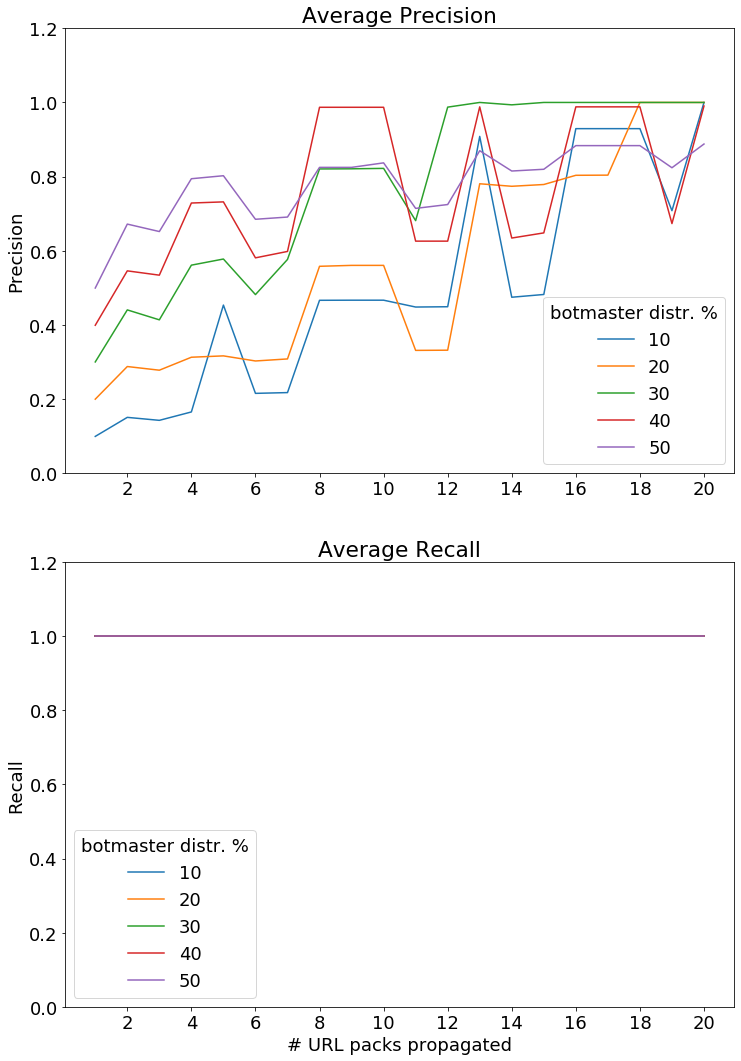

In [11]:
# Crawler-PS2-GSA
crawlerVersion = 'GSA'
peerSelectVersion = 2
if crawlerVersion in crawlers and peerSelectVersion in crawlers[crawlerVersion]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS2-GSA.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

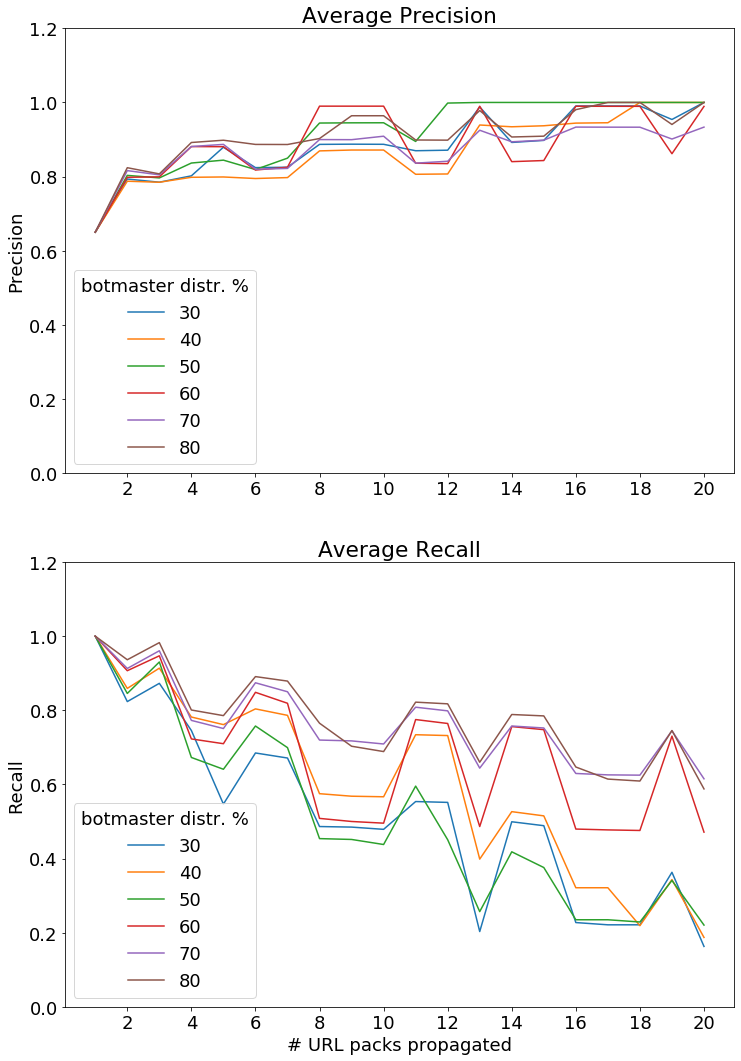

In [12]:
# Crawler-PS4-GSA
crawlerVersion = 'GSA'
peerSelectVersion = 4
if crawlerVersion in crawlers:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS4-GSA.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

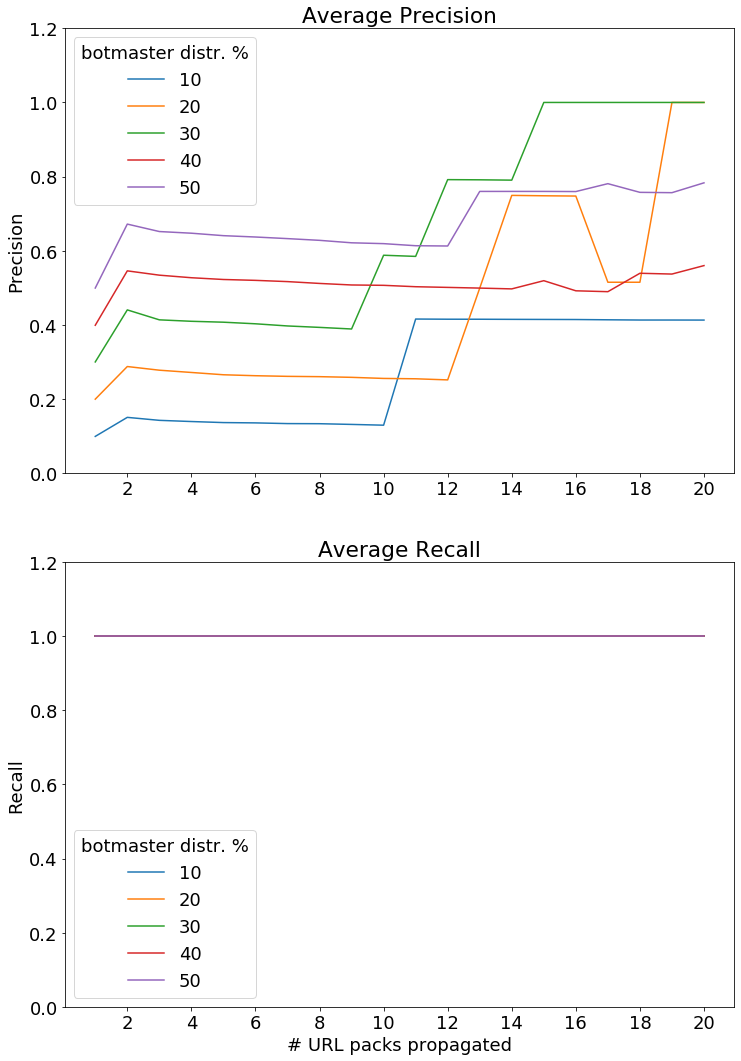

In [4]:
# Crawler-PS2-DROP
crawlerVersion = 'DROP'
peerSelectVersion = 2
if crawlerVersion in crawlers and peerSelectVersion in crawlers[crawlerVersion]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS2-DROP.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

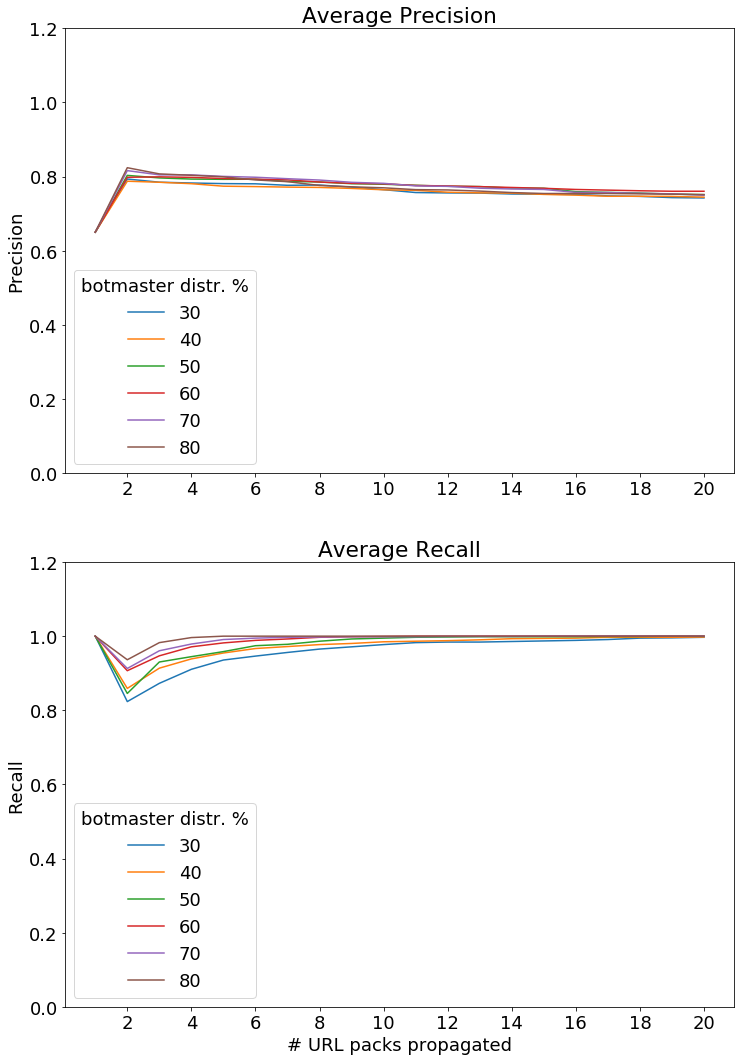

In [5]:
# Crawler-PS4-DROP
crawlerVersion = 'DROP'
peerSelectVersion = 4
if crawlerVersion in crawlers and peerSelectVersion in crawlers[crawlerVersion]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS4-DROP.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

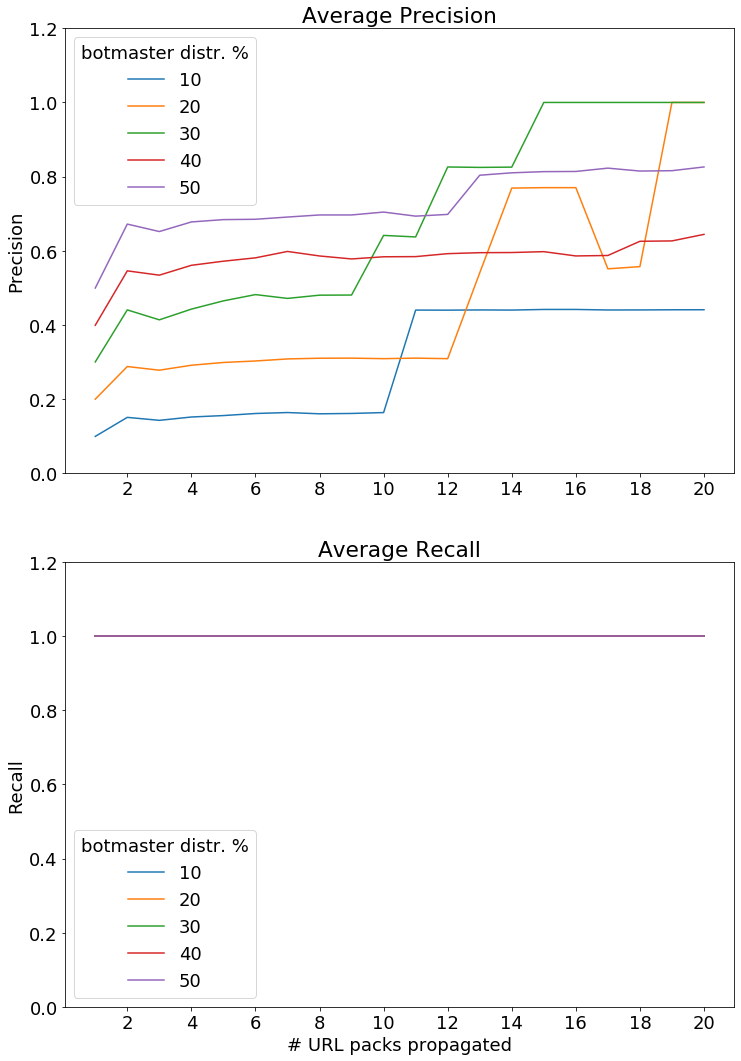

In [8]:
# Crawler-PS2-MGCDA
crawlerVersion = 'MGCDA'
peerSelectVersion = 2
if crawlerVersion in crawlers and peerSelectVersion in crawlers[crawlerVersion]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS2-MGCDA.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')

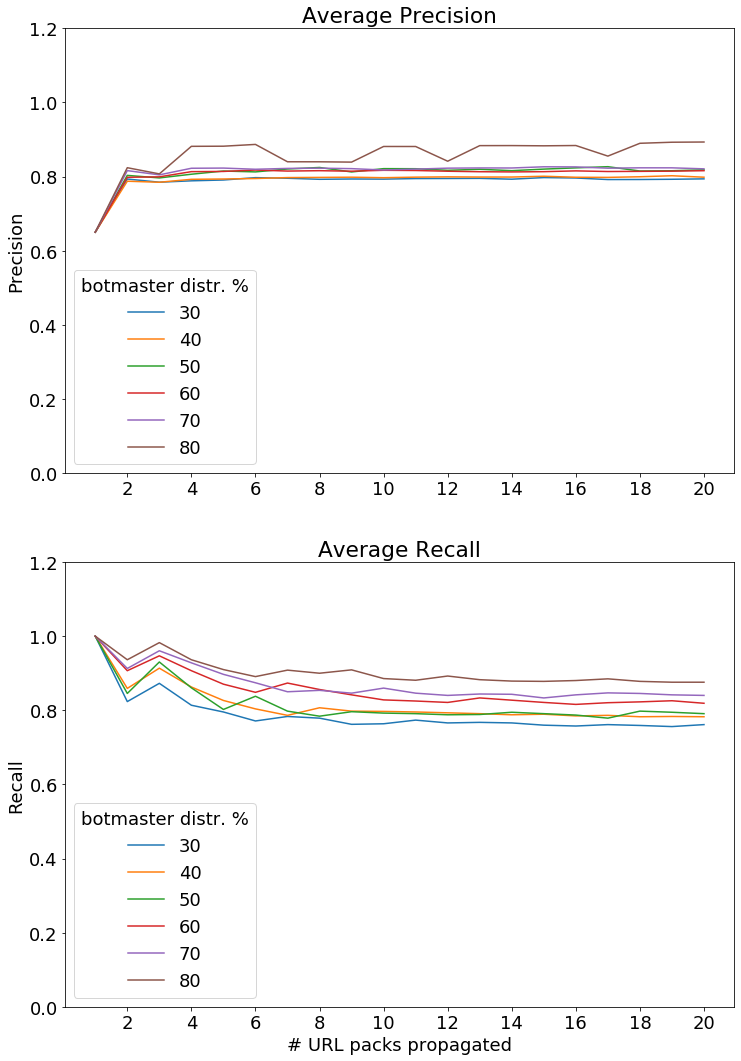

In [9]:
# Crawler-PS4-MGCDA
crawlerVersion = 'MGCDA'
peerSelectVersion = 4
if crawlerVersion in crawlers and peerSelectVersion in crawlers[crawlerVersion]:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,18))
    
    createPlot(ax1, ax2)
    plotData(crawlerVersion, peerSelectVersion)
    setPlotAttributes(ax1, ax2)

    fig.savefig('figures/Crawler-PS4-MGCDA.png', dpi=fig.dpi)
else:
    print('Run files could not be found!')